In [1]:
import os 
import pandas as pd
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import sys
sys.path.append("../../utilities/")
import data_utils
import evaluation_utils

In [13]:
resolution = 100000

In [ ]:
valid_bins = pd.read_csv("../../data/valid_bins/GM12878_100000_bins.txt", sep = "\t", header = None)
valid_bins.columns = ['chr_name', 'start', 'end', 'index']
valid_bins['pos'] = [int(p/100000) for p in valid_bins['start']]
valid_bins = valid_bins[['chr_name', 'pos']]
valid_pos = {}
valid_pos['chr21'] = valid_bins[valid_bins['chr_name'] == 'chr21']['pos'].values
valid_pos['chr22'] = valid_bins[valid_bins['chr_name'] == 'chr22']['pos'].values

In [65]:
annots = {}
for k in np.arange(4,11):
    annot = data_utils.read_annot_file("../../data/GM12878/annotations/res100000/func_k" + str(k) + ".bed", 1, resolution,1)
    annot = annot[annot['chr_name'].isin(['chr21'])]
    annot = data_utils.melt_annotation(annot)
    annot = annot[annot['pos'].isin(valid_pos['chr21'])]
    annot.reset_index(drop=True, inplace=True)
    annots[k] = annot

In [15]:
HiCs = {}
HiCs['chr21','chr21'] = data_utils.create_matrix("../../data", 'GM12878', 'chr21', 'chr21', resolution)
HiCs['chr21','chr21'] = HiCs['chr21','chr21'][np.ix_(valid_pos['chr21'],valid_pos['chr21'])]

In [67]:
for key in annots:
    print(key)

4
5
6
7
8
9
10


In [70]:
labels_overlaps = {}
for key in annots:
    annot = annots[key]
    labels = np.unique(annot['label'])
    labels_overlap = pd.DataFrame(index = labels, columns = labels)
    for label1 in labels:
        for label2 in labels:
            if label1 == label2:
                l = annot.index[annot['label']==label1].tolist()
                A = HiCs['chr21','chr21'][np.ix_(l,l)]
                labels_overlap.loc[label1,label2] = np.triu(A,1).mean() + np.diag(A).mean()
            else:
                l1 = annot.index[annot['label']==label1].tolist()
                l2 = annot.index[annot['label']==label2].tolist()
                A = HiCs['chr21','chr21'][np.ix_(l1,l2)]
                labels_overlap.loc[label1,label2] = A.mean()
    labels_overlaps[key] = labels_overlap

<AxesSubplot:>

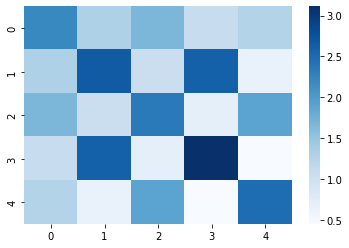

In [79]:
sns.heatmap(np.array(labels_overlaps[5].astype(float)), cmap = 'Blues')